In [35]:
%load_ext autoreload 
%autoreload 2

import pandas as pd
import analysis_kit as ak

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
%reload_ext autoreload

In [3]:
import os
os.getcwd()

'C:\\Users\\user\\Documents\\Coursera'

In [15]:
hfi=ak.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


#### First, lets go on and see if the distribution of returns among these hedge funds category are distributed normally?

##### One way to do that is to compare the mean and median of each of the category. 

##### If mean < Median, then the distribution is negatively skewed. 

In [16]:
pd.concat([hfi.mean(),hfi.median(),hfi.mean()<hfi.median()], axis="columns") # Columns because we wanna concatenate the 
                                                                            # columns

,0,1,2
Convertible Arbitrage,0.550837,0.65,True
CTA Global,0.407376,0.14,False
Distressed Securities,0.694601,0.89,True
Emerging Markets,0.625323,0.96,True
Equity Market Neutral,0.449810,0.51,True
Event Driven,0.634449,0.84,True
Fixed Income Arbitrage,0.436502,0.55,True
Global Macro,0.540304,0.38,False
Long/Short Equity,0.633080,0.79,True
Merger Arbitrage,0.535589,0.60,True


 #### As we can see above, 10 out of 13 hedge funds type's return distribution is negatively skewed since the mean returns is less than their median returns. 

Alright, if we now already know that most of these are negatively skewed distribution, is there any way to exactly know how much is the skewness for each of these?

In [18]:
ak.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

Dont you think it would be clear if we were to sort these values from largest to smallest skew?

#### Sure

In [20]:
ak.skewness(hfi).sort_values(ascending=True)

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

#### To calculate the skewness, we created our own module but you can also do this exact calculation by using a method like scipy.stats.skew(hfi)

So, how much skewness would the normal distribution of returns would have? Is it 0?

#### Yes, it is 0. I can prove that to you by just generating set of random numbers and simulating it

In [22]:
hfi.shape

(263, 13)

In [23]:
import numpy as np
normal_rets=np.random.normal(0, 0.15, size=(263,1))

In [24]:
ak.skewness(normal_rets)

0.12022264898884127

## OR

In [31]:
import scipy.stats
scipy.stats.skew(normal_rets)

array([0.00885168])

#### As you can see, 0.1202 is not that very far from 0. Moreover, if we were to increase the size i.e. the number of observations, the result would be more close to 0

In [25]:
normal_rets=np.random.normal(0, 0.15, size=(26300,1))
ak.skewness(normal_rets)

0.008851680910768043

#### There you go....!

## Now its time for Kurtosis

##### First, we need to go to our module kit and update the formula for kurtosis

In [28]:
ak.kurtosis(hfi).sort_values(ascending=False)

Fixed Income Arbitrage    29.842199
Convertible Arbitrage     23.280834
Equity Market Neutral     17.218555
Relative Value            12.121208
Emerging Markets           9.250788
Merger Arbitrage           8.738950
Event Driven               8.035828
Distressed Securities      7.889983
Funds Of Funds             7.070153
Short Selling              6.117772
Global Macro               5.741679
Long/Short Equity          4.523893
CTA Global                 2.952960
dtype: float64

#### Note that the normally distributed returns have a kurtosis of 3. Anything more than 3 is called excess kurtosis.

#### You might have already noticed that some hedge fund category have kurtosis of around 30. That is LITERALLY 10 times the kurtosis of a normally distributed returns

#### Lets compare the above with the randomly generated normal returns

In [29]:
ak.kurtosis(normal_rets)

3.0154570608328854

## OR

In [33]:
import scipy.stats
scipy.stats.kurtosis(normal_rets) 

array([0.01545706])

#### Now you might be thinking, "What is going on here? I thought the kurtosis for N.D was 3"

#### That is a valid question and the devil is in the detail here.

#### The reason why we are seeing a value near to 0 is because the method .kurtosis(), instead of resulting in kurtosis, is giving us a value of excess kurtosis. 

#### Excess kurtosis= kurtosis-3

#### SO we need to remember this point:

##### Our module that we created results in kurtosis but the scipy method kurtosis results in excess kurtosis

Alright, I got that. 

The next question I have is "How can we say with confidence that the result that we got for skewness and kurtosis are not just due to luck or a random chance?"

##### Thats a great question and the answer to that is we have to use a test called Jarque-Bera test to find out the answer.

In [34]:
# First, lets do the test for normally dist returns

scipy.stats.jarque_bera(normal_rets)

Jarque_beraResult(statistic=0.6052613503575549, pvalue=0.7388719297286692)

##### From the output, particularly the p-value, we can infer that the randomly generated returns are highly significant. 

##### The null hypothesis was "The returns are normally distributed". Since p-value is 0.73, this means no matter which significance level you choose i.e. 1% or 5%, we cannot gether evidence from the data to reject this null hypo. 

#### Hence, we can say the returns data is normally distributed. 

#### Now, lets run the jarque bera test on the hfi returns

##### But before that, we gotta update our analysis kit.

##### And lets first, apply the test to normal returns using our toolkit

In [37]:
ak.is_normal(normal_rets)

True

#### Now, on hedge fund returns

In [38]:
ak.is_normal(hfi)

False

#### We have many categories in hfi. The above result is not what we actually wanted. How can we measure the returns of each fund category and determine whetehr its normal or not?

In [39]:
hfi.aggregate(ak.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

##### The aggregate method takes the function that you give it and its gonna apply this function on every column and give you the result

##### Do you remember that we also have the ff data for small and large caps? Lets check their skewness and kurtosis.

In [43]:
ffme=ak.get_ffme_returns()
ak.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

#### Interestingly, the small caps have positive skewness

In [44]:
ak.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

##### Now, Jarque bera test on Small and Large cap stocks

In [45]:
ak.is_normal(ffme)

False

#### Again, this is not what we want. We want different output for each column. For that, we have to use the .aggregate() method

In [46]:
ffme.aggregate(ak.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

#### The False here indicates that for both small and large cap stocks, their p-values are less than 0.01. This means they are not significantly normally distributed. 

#### Or in other words, since the p-value is less than 1%, the null hypo that the returns of small and large caps are normally distributed is rejected.

# Downside measures!

In [1]:
import pandas as pd
import analysis_kit as ak

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%reload_ext autoreload

In [5]:
hfi=ak.get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


#### Let first talk about semi-deviation

In [6]:
hfi.std(ddof=0) # The standard deviation simply measures the avg deviation from the mean i.e. deviations both up and down
                # side.

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

But, we are not really concerned about the deviations in the upside right? We should only be worried about the deviations on the downside.

#### That is true. Therefore, we shall be computing semi-deviation that only focuses on the avg deviation on the downside

In [8]:
hfi[hfi<0].std(ddof=0).sort_values(ascending=True) #The element in the sq.bracket is called a "boolean mask".

Global Macro              0.006579
Merger Arbitrage          0.008875
Equity Market Neutral     0.009566
Funds Of Funds            0.012122
Relative Value            0.012244
CTA Global                0.012443
Long/Short Equity         0.014051
Distressed Securities     0.015185
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Convertible Arbitrage     0.019540
Short Selling             0.027283
Emerging Markets          0.028039
dtype: float64

In [15]:
ak.semideviation(hfi).sort_values()

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

## VaR (Value at Risk) and CVaR (Conditional Value at Risk)

Value at Risk (3 methods we gonna do today)

1. Historical VaR
2. Parametric VaR- Gaussian 
3. Modified Cornish-Fisher VaR


### 1. Historic VaR

It is basically saying "we already have a history of returns. so, if we are trying to find 5% VaR, we could just simply look at the past returns and what was the 5 percentile number. 

IOW, what was that horrible worst 5% of returns or what was that cutoff?

In [16]:
import numpy as np

In [17]:
np.percentile(hfi, 5, axis=0) # axis =0 coz we want to calculate the 5th percentile of returns for every column and not
                            # all the returns in the df

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

But how do I interpret this?

##### For example, for the first element in the list, there is 5% chance that in any given month the conv. arbitrage segment is gonna lose 1.5% or more   

Can we get the output in a series which is kinda labeled by each segment instead of getting an array of values like we did above?

##### Sure. we can define a new funtion for that. This is gonna be slightly new type of code for you. So, brace yourself:

In [22]:
def var_historic(r, level=5):
    """
    Historic VaR
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or a DataFrame")

In [23]:
var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

## OR

In [24]:
%autoreload

In [25]:
ak.var_historic(hfi)

Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

### 2. Gaussian VaR

In [26]:
from scipy.stats import norm   # Instead of importing all of the scipy.stats, you can just import "norm"

In [28]:
z_score= norm.ppf(0.05) # Converts a percent funtion to a z score
        # Conversion to a z score is done to know how many sd away from mean this cutoff line of 5% is. 

In [30]:
-(hfi.mean() + z_score*hfi.std(ddof=0))

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

## OR

In [31]:
%autoreload

In [32]:
ak.var_gaussian(hfi)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

##### This is the Gaussian VaR. Simple and easy right?!

## Cornish-Fisher VaR

#### It says "Lets adjust that z score because we know that the returns are not normal, we know that they have kurtosis >3 and skewness not equal to 0."

In [42]:
%autoreload

In [43]:
ak.var_corfish(hfi)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

#### In order to properly navigate, lets create a plot which includes the results from these 3 methods

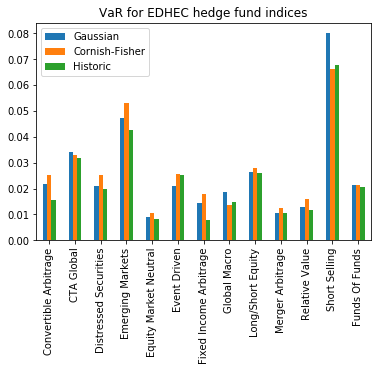

In [45]:
var_list=[ak.var_gaussian(hfi), ak.var_corfish(hfi), ak.var_historic(hfi)]
comparison=pd.concat(var_list, axis=1)
comparison.columns=["Gaussian", "Cornish-Fisher","Historic"]
comparison.plot.bar(title="VaR for EDHEC hedge fund indices")

## Beyond VaR or CVaR

In [46]:
%autoreload

In [47]:
ak.cvar_historic(hfi)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64

But how do we interpret this?

##### This simply means that when those extreme and worst  5% of the possible cases happens, then the average of those events is a 3.65% loss in a month for conv arb strategy. 